In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

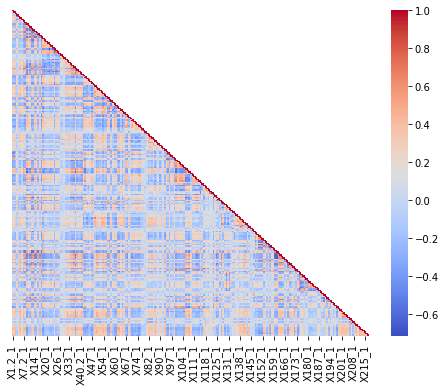

In [33]:
df = pd.read_csv(os.path.expanduser('~/Desktop/Controlparticipants_corrtable.csv'))
df1 = df.drop('Unnamed: 0', axis=1)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df1, yticklabels=False,cmap='coolwarm')

In [34]:
corr = df1.values
dsm1 = 1-corr

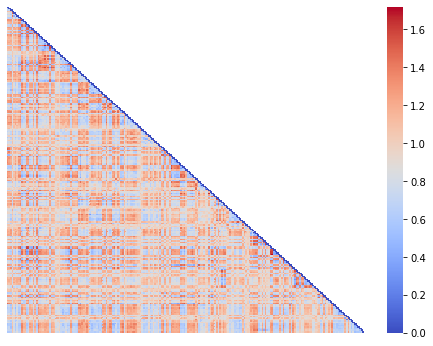

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dsm1, yticklabels=False,xticklabels=False,cmap='coolwarm')

In [49]:
mask = np.ones_like(corr[corr==corr])
mask2 = np.zeros_like(corr[corr!=corr])

In [70]:
vect_corr = corr[np.tril_indices(199)]
squareform(vect_corr).shape

(200, 200)

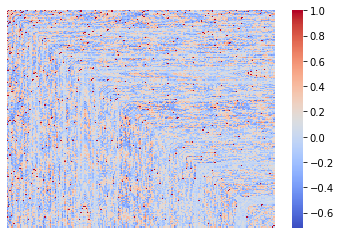

In [71]:
sns.heatmap(squareform(vect_corr), yticklabels=False,xticklabels=False,cmap='coolwarm')

In [7]:
# create 100 random matrices of 200 features, 100 samples; display one of them
random_matrices = [np.random.rand(100,200) for i in range(100)]

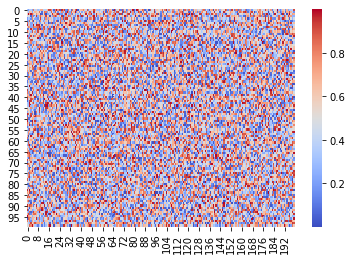

In [8]:
sns.heatmap(random_matrices[0],cmap='coolwarm')

In [28]:
# This will create a second-order RDM; comparing the similarity structure within a cluster to
# that of other clusters, given our random dataset.

In [29]:
# create arbitrary feature clusters ; 5 consecutive features per cluster, 40 clusters
clusters = np.array_split(np.arange(200), 40)
# loop through all clusters; create one RDM per cluster
rdms = []
for cluster in clusters:
    # get all the cluster data for each matrix in the cluster; vectorize
    # becomes (100, 1000) - one vectorized cluster per matrix
    cluster_data = np.array([mat[:,cluster].ravel() for mat in random_matrices])
    dsm = pdist(cluster_data, 'correlation') # dissimilarity between each cluster
    # if you want it in squareform, can do:
    #dsm_sq = squareform(dsm)
    # but as is, each DSM is the vectorized lower triangle of a correlation distance matrix
    rdms.append(dsm)

# this gives you a RDM for each cluster. (vectorized)
rdms = np.array(rdms)
cluster_rdm = squareform(pdist(rdms, 'correlation'))


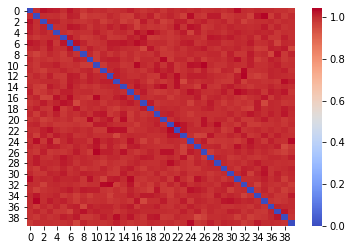

In [30]:
# since there's no structure to this data, the correlation distance between things is nearly always 1 - no correlation
# aside from along the diagonal
sns.heatmap(cluster_rdm, cmap='coolwarm')

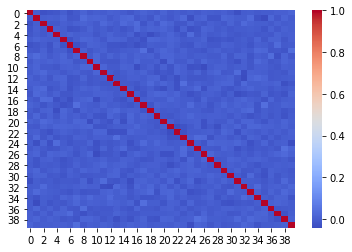

In [31]:
# can flip it to correlation
sns.heatmap(1-cluster_rdm, cmap='coolwarm')